##### Data Preprocessing

In [8]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Columns to Add
name = []
location = []
description = []
url = []
protected = []
followers_count = []
friends_count = []
listed_count = []
favourites_count = []
verified = []
statuses_count = []
lang = []
contributors_enabled = []
is_translator = []
is_translation_enabled = []
profile_background_image_url = []
default_profile = []
default_profile_image = []
num_total_tweets = []
num_retweets = []

# Concatenate all data
df_train=pd.read_json('drive/MyDrive/ECE 460J/Final Project/DS_Lab_Final_Project/Twibot20/train.json')
df_dev=pd.read_json('drive/MyDrive/ECE 460J/Final Project/DS_Lab_Final_Project/Twibot20/dev.json')
df_test=pd.read_json('drive/MyDrive/ECE 460J/Final Project/DS_Lab_Final_Project/Twibot20/test.json')
df = pd.concat([df_train, df_dev, df_test], ignore_index=True)
len(df)

profiles = df['profile'].to_list()
tweets = df['tweet'].to_list()

count = 0
for profile in profiles:
  name.append(profile['name'])
  location.append(profile['location'])
  description.append(profile['description'])
  url.append(profile['url'])
  protected.append(profile['protected'])
  followers_count.append(int(profile['followers_count']))
  friends_count.append(int(profile['friends_count']))
  listed_count.append(int(profile['listed_count']))
  favourites_count.append(int(profile['favourites_count']))
  verified.append(profile['verified'])
  statuses_count.append(int(profile['statuses_count']))
  lang.append(profile['lang'])
  contributors_enabled.append(profile['contributors_enabled'])
  is_translator.append(profile['is_translator'])
  is_translation_enabled.append(profile['is_translation_enabled'])
  profile_background_image_url.append(profile['profile_background_image_url'])
  default_profile.append(profile['default_profile'])
  default_profile_image.append(profile['default_profile_image'])

for tweet in tweets:
  if tweet != None:
    num_total_tweets.append(len(tweet))
    num_retweets.append(sum('RT' in s for s in tweet))
  else:
    num_total_tweets.append(0)
    num_retweets.append(0)
  
# print(len(name))
# print(len(location))
# print(len(description))
# print(len(url))
# print(len(protected))
# print(len(followers_count))
# print(len(friends_count))
# print(len(listed_count))
# print(len(favourites_count))
# print(len(verified))
# print(len(statuses_count))
# print(len(lang))
# print(len(contributors_enabled))
# print(len(is_translator))
# print(len(is_translation_enabled))
# print(len(profile_background_image_url))
# print(len(default_profile))
# print(len(default_profile_image))
# print(len(num_total_tweets))
# print(len(num_retweets))

df['name'] = name
df['location'] = location
df['description'] = description
df['url'] = url
df['protected'] = protected
df['followers_count'] = followers_count
df['friends_count'] = friends_count
df['listed_count'] = listed_count
df['favourites_count'] = favourites_count
df['verified'] = verified
df['statuses_count'] = statuses_count
df['lang'] = lang
df['contributors_enabled'] = contributors_enabled
df['is_translator'] = is_translator
df['is_translation_enabled'] = is_translation_enabled
df['profile_background_image_url'] = profile_background_image_url
df['default_profile'] = default_profile
df['default_profile_image'] = default_profile_image
df['num_total_tweets'] = num_total_tweets
df['num_retweets'] = num_retweets

##### Answering Questions

In [3]:
# Question 1: Number of Twitter Users
print(len(df))

11826


In [4]:
# Question 2: Number of Twitter Bots
print(len(df[df['label'] == 1]))

6589


In [5]:
# Question 3: Number of Real People
print(len(df[df['label'] == 0]))

5237


In [56]:
# Question 4: Number of Public Twitter Users (Bots and Real People)
# Question 5: Number of Private Twitter USers (Bots and Real People)

count_private = 0
count_public = 0
protected = df['protected'].to_list()
for state in protected:
  if "False" in state:
    count_public += 1
  else:
    count_private += 1

print("Public users: " + str(count_public))
print("Private users: " + str(count_private))
    

Public users: 11824
Private users: 2


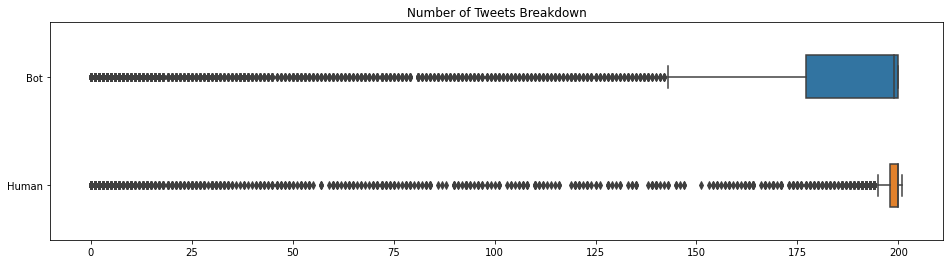

In [25]:
# Question 6: Number of tweets on average per use (real user and bots)
# Question 7: Number of tweets per bot
# Question 8: Number of tweets per real person
# print(df['num_total_tweets'].describe())
# print(df[df['label'] == 1]['num_total_tweets'].describe())
# print(df[df['label'] == 0]['num_total_tweets'].describe())
tweets_bots = df[df['label'] == 1]['num_total_tweets'].to_list()
tweets_real = df[df['label'] == 0]['num_total_tweets'].to_list()
my_dict = {'Bot': tweets_bots, 'Human': tweets_real}
df_tweets = pd.Series(tweets_bots, name="Bot").to_frame().join(pd.Series(tweets_real, name="Human"))
plt.figure(figsize=(16, 4))
plt.title("Number of Tweets Breakdown")
sns.boxplot(data=df_tweets, orient="h", width = 0.4) 

# fig, ax = plt.subplots()
# ax.boxplot(my_dict.values(), showfliers=False)
# ax.set_xticklabels(my_dict.keys())

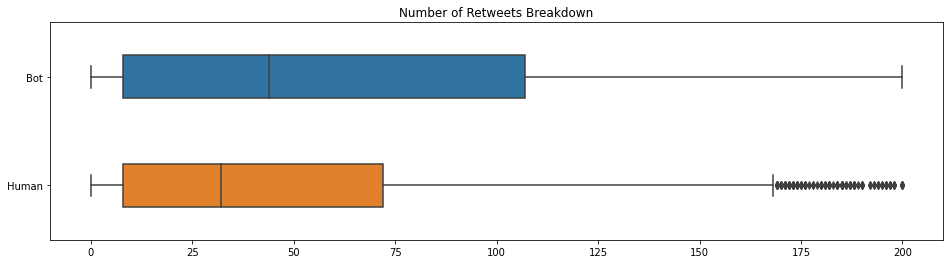

In [26]:
# Question 9: Number of retweets on average per use (real user and bots)
# Question 10: Number of retweets per bot
# Question 11: Number of retweets per real person
# print(df['num_retweets'].describe())
# print(df[df['label'] == 1]['num_retweets'].describe())
# print(df[df['label'] == 0]['num_retweets'].describe())

retweet_bots = df[df['label'] == 1]['num_retweets'].to_list()
retweet_real = df[df['label'] == 0]['num_retweets'].to_list()
my_dict = {'Bot': retweet_bots, 'Human': retweet_real}
df_tweets = pd.Series(retweet_bots, name="Bot").to_frame().join(pd.Series(retweet_real, name="Human"))
plt.figure(figsize=(16, 4))
plt.title("Number of Retweets Breakdown")
sns.boxplot(data=df_tweets, orient="h", width = 0.4)

In [99]:
# Question 12: Number and percentage of bots with empty strings for description
# Question 13: Number and percentage of real users with empty strings for description
print(len(df[(df['description'] == ' ') & (df['label'] == 1)]) / len(df[df['label'] == 1]) * 100)
print(len(df[(df['description'] == ' ') & (df['label'] == 1)]))
print(len(df[(df['description'] == ' ') & (df['label'] == 0)]) / len(df[df['label'] == 0]) * 100)
print(len(df[(df['description'] == ' ') & (df['label'] == 0)]))

15.677644559113673
1033
9.356501814015658
490


In [101]:
# Question 14: Number and percentage of bots with empty strings for location
# Question 15: Number and percentage of real users with empty strings for location
print(len(df[(df['location'] == ' ') & (df['label'] == 1)]) / len(df[df['label'] == 1]) * 100)
print(len(df[(df['location'] == ' ') & (df['label'] == 1)]))
print(len(df[(df['location'] == ' ') & (df['label'] == 0)]) / len(df[df['label'] == 0]) * 100)
print(len(df[(df['location'] == ' ') & (df['label'] == 0)]))

30.414326908483837
2004
27.573037998854304
1444


In [134]:
# Question 16: Number and percentage of bots with empty urls
# Question 17: Number and percentage of real users with empty urls
print(len(df[(df['url'] == "None ") & (df['label'] == 1)]) / len(df[df['label'] == 1]) * 100)
print(len(df[(df['url'] == "None ") & (df['label'] == 1)]))
print(len(df[(df['url'] == "None ") & (df['label'] == 0)]) / len(df[df['label'] == 1]) * 100)
print(len(df[(df['url'] == "None ") & (df['label'] == 0)]))

60.40370314159964
3980
31.23387463955077
2058


In [58]:
print(len(df[(df['default_profile_image'] == "True ") & (df['label'] == 1)]) / len(df[df['label'] == 1]) * 100)
print(len(df[(df['default_profile_image'] == "True ") & (df['label'] == 0)]) / len(df[df['label'] == 0]) * 100)

3.6424343602974654
1.241168607981669


[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Feature'),
 Text(0.5, 1.0, 'Account Profile Comparison')]

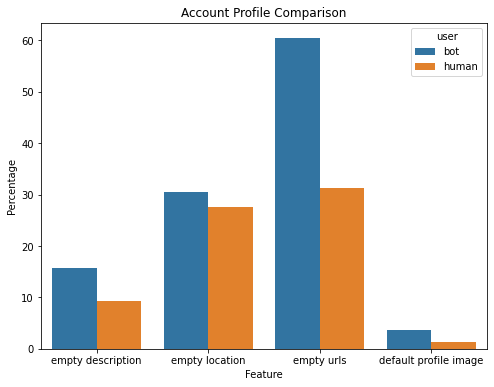

In [60]:
types = ['empty description', 'empty description', 'empty location', 'empty location', 'empty urls', 'empty urls', 'default profile image', 'default profile image']
user = ['bot', 'human', 'bot', 'human', 'bot', 'human', 'bot', 'human']
percentages = [15.68, 9.35, 30.41, 27.57, 60.40, 31.23, 3.64, 1.24]
columns = ['types', 'user', 'percentages']
df_strings = pd.DataFrame(columns=columns)
df_strings['type'] = types
df_strings['user'] = user
df_strings['percentages'] = percentages
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_strings, x="type", y="percentages", hue="user")
ax.set(xlabel='Feature',
       ylabel='Percentage',
       title='Account Profile Comparison')

,Bot,Human
0,0,15349596.0
1,13324,762839.0
2,4,327587.0
3,13120,12601567.0
4,2829,112403156.0
...,...,...
6584,7760,NaN
6585,8446,NaN
6586,309,NaN
6587,154,NaN


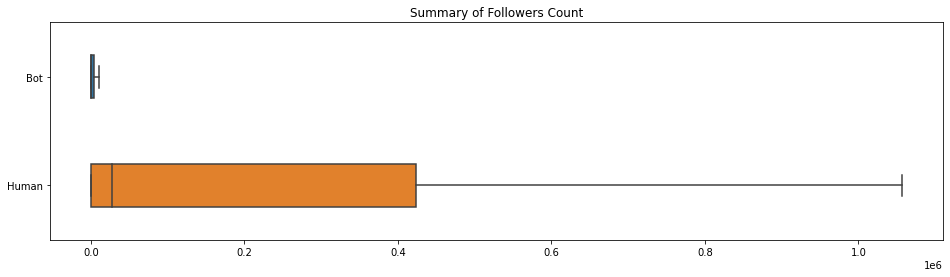

In [48]:
# Question 18: Follower count description for bots
# Question 19: Follower count description for real people
# print(df[df['label'] == 1]['followers_count'].describe())
# print(df[df['label'] == 0]['followers_count'].describe())
followers_bot = df[df['label'] == 1]['followers_count'].to_list()
followers_human = df[df['label'] == 0]['followers_count'].to_list()
df_counts = pd.Series(followers_bot, name="Bot").to_frame().join(pd.Series(followers_human, name="Human"))
plt.figure(figsize=(16, 4))
plt.title("Summary of Followers Count")
ax = sns.boxplot(data=df_counts, showfliers=False, orient="h", width = 0.4)
df_counts

count      6589.000000
mean       5084.815905
std       24215.345376
min           0.000000
25%         263.000000
50%         839.000000
75%        2622.000000
max      804528.000000
Name: friends_count, dtype: float64
count    5.237000e+03
mean     8.732032e+03
std      8.799850e+04
min      0.000000e+00
25%      2.100000e+02
50%      6.140000e+02
75%      1.668000e+03
max      4.339982e+06
Name: friends_count, dtype: float64


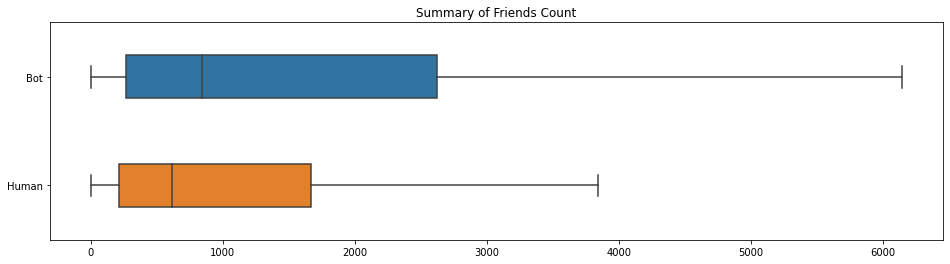

In [50]:
# Question 20: Friend count description for bots
# Question 21: Friend count description for real people
print(df[df['label'] == 1]['friends_count'].describe())
print(df[df['label'] == 0]['friends_count'].describe())
bot_count = df[df['label'] == 1]['friends_count'].to_list()
human_count = df[df['label'] == 0]['friends_count'].to_list()
df_counts = pd.Series(bot_count, name="Bot").to_frame().join(pd.Series(human_count, name="Human"))
plt.figure(figsize=(16, 4))
plt.title("Summary of Friends Count")
ax = sns.boxplot(data=df_counts, showfliers=False, orient="h", width = 0.4)

In [144]:
# Question 22: List count desription for bots
# Question 23: List count desription for real people
print(df[df['label'] == 1]['listed_count'].describe())
print(df[df['label'] == 0]['listed_count'].describe())

count     6589.000000
mean       112.172257
std        642.844836
min          0.000000
25%          0.000000
50%          4.000000
75%         34.000000
max      21801.000000
Name: listed_count, dtype: float64
count      5237.000000
mean       3366.707084
std       14049.919193
min           0.000000
25%           4.000000
50%         212.000000
75%        1640.000000
max      550181.000000
Name: listed_count, dtype: float64


count      6589.000000
mean      14831.459250
std       42983.019489
min           0.000000
25%         104.000000
50%        1424.000000
75%        9502.000000
max      783456.000000
Name: favourites_count, dtype: float64
count      5237.000000
mean      10866.417987
std       30990.344161
min           0.000000
25%         229.000000
50%        1799.000000
75%        8759.000000
max      739258.000000
Name: favourites_count, dtype: float64


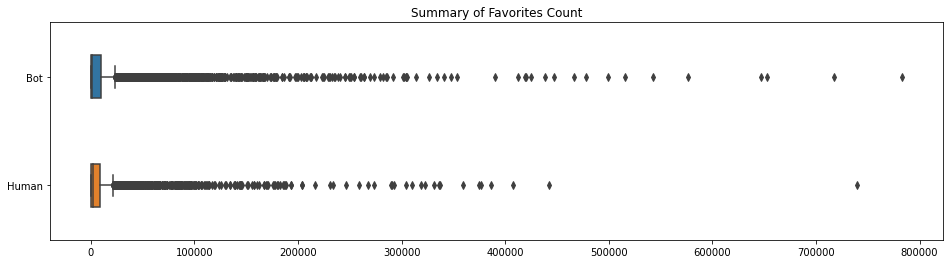

In [52]:
# Question 24: Favorites count desription for bots
# Question 25: Favorites count desription for real people
print(df[df['label'] == 1]['favourites_count'].describe())
print(df[df['label'] == 0]['favourites_count'].describe())
bot_count = df[df['label'] == 1]['favourites_count'].to_list()
human_count = df[df['label'] == 0]['favourites_count'].to_list()
df_counts = pd.Series(bot_count, name="Bot").to_frame().join(pd.Series(human_count, name="Human"))
plt.figure(figsize=(16, 4))
plt.title("Summary of Favorites Count")
ax = sns.boxplot(data=df_counts, orient="h", width = 0.4)

In [146]:
# Question 26: Verified count for bots
# Question 27: Verified count for real people
print(df['verified'])

0         True 
1        False 
2         True 
3         True 
4        False 
          ...  
11821    False 
11822    False 
11823    False 
11824    False 
11825    False 
Name: verified, Length: 11826, dtype: object


In [154]:
# Question 28: Number and percentage of bots that are verified
count_verified = 0
verified = df[df['label'] == 1]['verified'].to_list()
for state in verified:
  if "True" in state:
    count_verified += 1

print("Number of bots that are verified: " + str(count_verified))
print("Percentage of bots that are verified: " + str(count_verified / len(df[df['label'] == 1]) * 100))

Number of bots that are verified: 1
Percentage of bots that are verified: 0.015176809834572773


In [155]:
# Question 29: Number and percentage of real people that are verified
count_verified = 0
verified = df[df['label'] == 0]['verified'].to_list()
for state in verified:
  if "True" in state:
    count_verified += 1

print("Number of real people that are verified: " + str(count_verified))
print("Percentage of real people that are verified: " + str(count_verified / len(df[df['label'] == 1]) * 100))

Number of real people that are verified: 2963
Percentage of real people that are verified: 44.96888753983912


{'Politics': 1225, 'Business': 1637, 'Entertainment': 1742, 'Sports': 2271}


([<matplotlib.patches.Wedge at 0x7f241c094940>,
 [Text(0.9321122586271182, 0.5840948016521397, 'Politics'),
  Text(-0.32170232165324636, 1.0519066575713416, 'Business'),
  Text(-1.0601295788427996, -0.2934710821573205, 'Entertainment'),
  Text(0.5589717861660917, -0.9473914408892923, 'Sports')],
 [Text(0.5084248683420645, 0.31859716453753073, '17.82%'),
  Text(-0.17547399362904345, 0.5737672677661863, '23.81%'),
  Text(-0.5782524975506178, -0.16007513572217477, '25.34%'),
  Text(0.30489370154514084, -0.5167589677577957, '33.03%')])

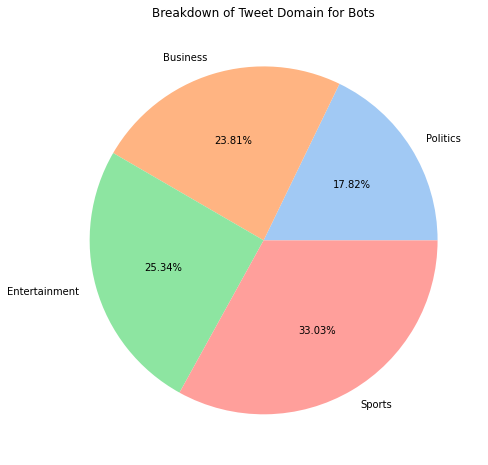

In [37]:
# Question 30: Domain breakdown for bots
df_bots = df[df['label'] == 1]
domain_lists = df_bots['domain']
counts = {}
for list in domain_lists:
  for element in list:
    if element in counts:
      counts[element] += 1
    else:
      counts[element] = 0
print(counts)

count = [1225, 1637, 1742, 2271]
domain = ['Politics', 'Business', 'Entertainment', 'Sports']

colors = sns.color_palette('pastel')[0:4]
plt.figure(figsize=(8, 8))
plt.title("Breakdown of Tweet Domain for Bots")
plt.pie(count, labels=domain, colors=colors, autopct='%.2f%%')

{'Politics': 2033, 'Business': 2001, 'Entertainment': 2045, 'Sports': 1611}


([<matplotlib.patches.Wedge at 0x7f241c066130>,
 [Text(0.7419243453357368, 0.8121257696921941, 'Politics'),
  Text(-0.8669347868962278, 0.6770702144306691, 'Business'),
  Text(-0.6036808783358106, -0.9195484745959315, 'Entertainment'),
  Text(0.8702436500813506, -0.672812001597094, 'Sports')],
 [Text(0.4046860065467655, 0.4429776925593785, '26.44%'),
  Text(-0.4728735201252151, 0.3693110260530922, '26.02%'),
  Text(-0.32928047909226027, -0.5015718952341444, '26.59%'),
  Text(0.47467835458982754, -0.36698836450750577, '20.95%')])

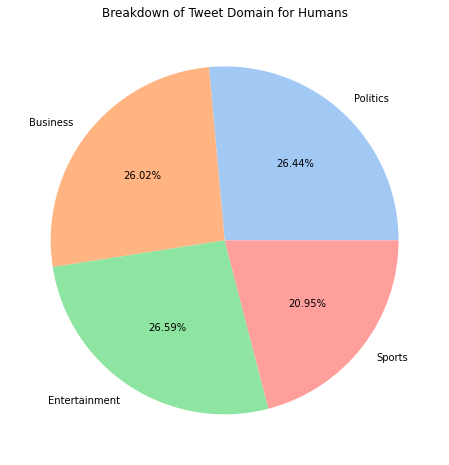

In [38]:
# Question 31: Domain breakdown for real users
df_bots = df[df['label'] == 0]
domain_lists = df_bots['domain']
counts = {}
for list in domain_lists:
  for element in list:
    if element in counts:
      counts[element] += 1
    else:
      counts[element] = 0
print(counts)

count = [2033, 2001, 2045, 1611]
domain = ['Politics', 'Business', 'Entertainment', 'Sports']

colors = sns.color_palette('pastel')[0:4]
plt.figure(figsize=(8, 8))
plt.title("Breakdown of Tweet Domain for Humans")
plt.pie(count, labels=domain, colors=colors, autopct='%.2f%%')

In [172]:
# Question 32: Number and percentage of bots with default profile image
# Question 33: Number and percentage of real users with default profile image
print(len(df[(df['label'] == 1) & (df['default_profile_image'] == 'False ')]) / len(df[df['label'] == 1]) * 100)
print(len(df[(df['label'] == 1) & (df['default_profile_image'] == 'False ')]))
print(len(df[(df['label'] == 0) & (df['default_profile_image'] == 'False ')]) / len(df[df['label'] == 0]) * 100)
print(len(df[(df['label'] == 0) & (df['default_profile_image'] == 'False ')]))

96.35756563970254
6349
98.75883139201834
5172
